In [2]:
import pandas as pd
from sklearn import preprocessing

df = pd.read_csv("profile_jan_2022.csv", encoding="cp850")


In [3]:
df.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020
0,0.853350,0.065328,0.228967,2.016161,0.0,0.0,92.799,914.630,245,1891
1,0.857153,0.069790,0.152220,2.000837,0.0,0.0,86.097,832.387,188,1969
2,0.860945,0.064174,0.109599,1.965811,0.0,0.0,72.062,926.463,139,1985
3,0.888022,0.064889,0.055622,2.646621,0.0,0.0,73.376,691.546,115,1852
4,0.859141,0.063968,0.039038,3.246434,0.0,0.0,68.995,453.314,163,1709


In [4]:
def normalize(dataframe, columns=None):
    """
    :return dataframe (normalized):
    """
    df = dataframe

    if columns is None:
        columns = df.columns

    x = df[columns].values  # returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    ndf = pd.DataFrame(x_scaled, columns=df[columns].columns, index=df.index)
    return ndf

In [5]:
df = normalize(df)

In [6]:
import numpy as np
dates = np.arange("2021-01-01","2022-01-01 00:00", dtype="datetime64[h]")
df.index = dates
df.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020
2021-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.0,0.0,0.034815,0.313971,0.081336,0.636425
2021-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.0,0.0,0.032298,0.285723,0.062099,0.662732
2021-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.0,0.0,0.027026,0.318035,0.045562,0.668128
2021-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.0,0.0,0.027519,0.237349,0.037462,0.623272
2021-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.0,0.0,0.025874,0.155524,0.053662,0.575042


<AxesSubplot:>

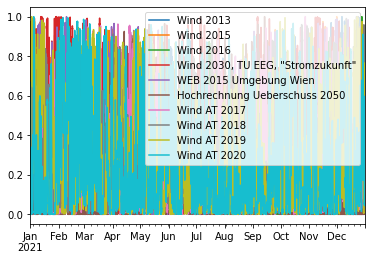

In [7]:
df.plot()

In [8]:
manutz = ["MANutz/Schaltsignal_REF.csv",
"MANutz/Schaltsignal_REG.csv",
"MANutz/Schaltsignal_uba30.csv",
"MANutz/Schaltsignal_uba50.csv",
"MANutz/Schaltsignal_veigl30.csv",
"MANutz/Schaltsignal_veigl50.csv" ]

df_nutz = pd.DataFrame()
for p in manutz:
    a = pd.read_csv(p).iloc[:,1]
    df_nutz[p.split("_")[1][:-4]] = a
df_nutz.index = dates
df_nutz.head()
df_nutz = df_nutz.replace(1,-1)
df_nutz = df_nutz.replace(0,1).replace(-1,0)


In [9]:
df=pd.concat([df, df_nutz], axis=1)
df.head()


,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,REF,REG,uba30,uba50,veigl30,veigl50
2021-01-01 00:00:00,0.623076,0.029658,0.089650,0.301967,0.0,0.0,0.034815,0.313971,0.081336,0.636425,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-01 01:00:00,0.625853,0.031710,0.059536,0.299672,0.0,0.0,0.032298,0.285723,0.062099,0.662732,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-01 02:00:00,0.628622,0.029128,0.042812,0.294426,0.0,0.0,0.027026,0.318035,0.045562,0.668128,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-01 03:00:00,0.648394,0.029456,0.021632,0.396393,0.0,0.0,0.027519,0.237349,0.037462,0.623272,1.0,1.0,1.0,1.0,1.0,1.0
2021-01-01 04:00:00,0.627305,0.029033,0.015125,0.486230,0.0,0.0,0.025874,0.155524,0.053662,0.575042,0.0,0.0,0.0,0.0,0.0,1.0


Freigabesignal wenn > x% der Nennleistung

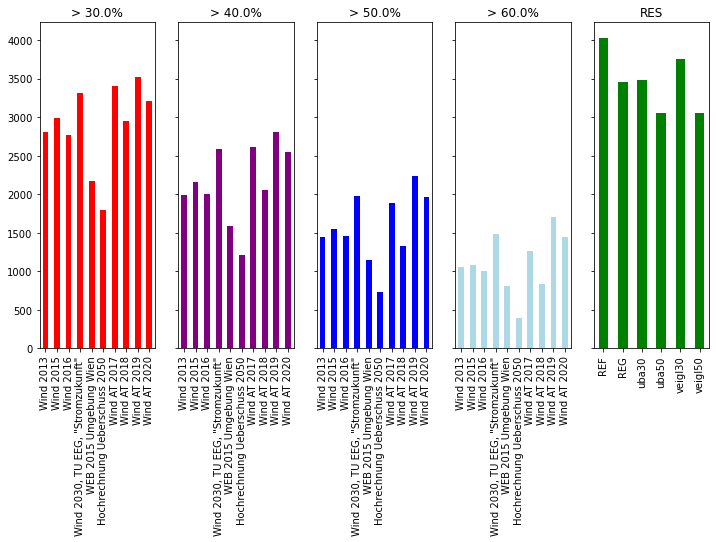

In [10]:
import matplotlib.pyplot as plt

cutoffs = [0.3,0.4,0.5,0.6]
colors=["red","purple","blue", "lightblue"]
anzahl = pd.DataFrame()
c1 = df.columns[:-6]
c2 = df.columns[-6:]
fig, ax = plt.subplots(1, len(cutoffs)+1, sharey=True, figsize=(12,6))
for i, x in enumerate(cutoffs):
    sig = df[c1].where(df>x)
    sig.count().plot(kind="bar", ax=ax[i], title=f"> {x*100}%", color=colors[i])


sig = df[c2].where(df>x)
sig.count().plot(kind="bar", ax=ax[len(cutoffs)], title="RES", color="green")

fig.savefig("freigabestunden.png", dpi=300, bbox_inches="tight")

In [ ]:
import seaborn as sns
#anzahl
sns.relplot(data=anzahl)

In [12]:
df.columns

Index(['Wind 2013', 'Wind 2015', 'Wind 2016',
       'Wind 2030, TU EEG, "Stromzukunft"', 'WEB 2015 Umgebung Wien',
       'Hochrechnung Ueberschuss 2050', 'Wind AT 2017', 'Wind AT 2018',
       'Wind AT 2019', 'Wind AT 2020', 'REF', 'REG', 'uba30', 'uba50',
       'veigl30', 'veigl50'],
      dtype='object')

In [13]:
cut = 0.4
df_sign = pd.DataFrame()
for c in df.columns:
    df_sign[c] = df[c].map(lambda x: -1 if x < cut else 1)


In [14]:
df_sign.head()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,REF,REG,uba30,uba50,veigl30,veigl50
2021-01-01 00:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1
2021-01-01 01:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1
2021-01-01 02:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1
2021-01-01 03:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1
2021-01-01 04:00:00,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1


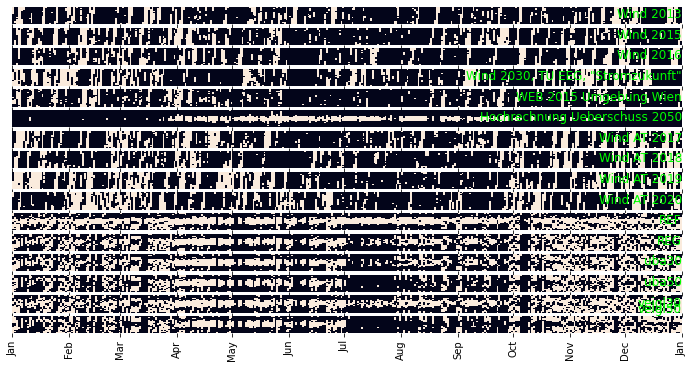

In [15]:
from matplotlib.dates import MonthLocator
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots(len(df_sign.columns), 1, sharex=True, sharey=True, figsize=(12,6))
for i, col in enumerate(df_sign.columns):
    vis = pd.pivot_table(df_sign,
                         index=df_sign.index.date, columns=df_sign.index.hour, values=col)
    sns.heatmap(vis.T,
                cbar=False,
                yticklabels=False,
                ax=ax[i])
    ax[i].set_title(col, loc="right", color="lime", fontsize=12, pad=-11)
    months = MonthLocator()
    monthsFmt = DateFormatter("%b")
    ax[i].xaxis.set_major_locator(months)
    ax[i].xaxis.set_major_formatter(monthsFmt)

In [16]:
fig.savefig("heatmap.png", dpi=300)

In [17]:

df_sign

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,REF,REG,uba30,uba50,veigl30,veigl50
2021-01-01 00:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1
2021-01-01 01:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1
2021-01-01 02:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1
2021-01-01 03:00:00,1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1
2021-01-01 04:00:00,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,1
2021-12-31 20:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,1
2021-12-31 21:00:00,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,1
2021-12-31 22:00:00,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,1,1,1,1,1


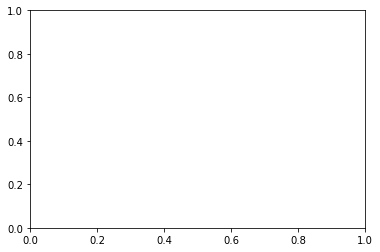

In [18]:
df_step = pd.DataFrame()
df_not = pd.DataFrame()

fig, ax = plt.subplots()
for c in df_sign.columns:
    df_step[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==1).cumsum()
    df_not[c] =  df_sign[c].shift(1).ne(df_sign[c]).where(df_sign[c]==-1).cumsum()

In [19]:
df_step.iloc[0,:] = 0
df_step

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,REF,REG,uba30,uba50,veigl30,veigl50
2021-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01-01 01:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1
2021-01-01 02:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1
2021-01-01 03:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,1,1
2021-01-01 04:00:00,1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,674.0,666.0,667.0,565.0,718.0,538.0
2021-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,674.0,666.0,667.0,565.0,718.0,538.0
2021-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,674.0,666.0,667.0,565.0,718.0,538.0
2021-12-31 22:00:00,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.0,NaN,674.0,666.0,667.0,565.0,718.0,538.0


C:\Users\SIMONS~1\AppData\Local\Temp/ipykernel_19588/654340702.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_step["2021"].plot(figsize=(12,6), ylabel="Number of Signal", grid=True, ax=ax)


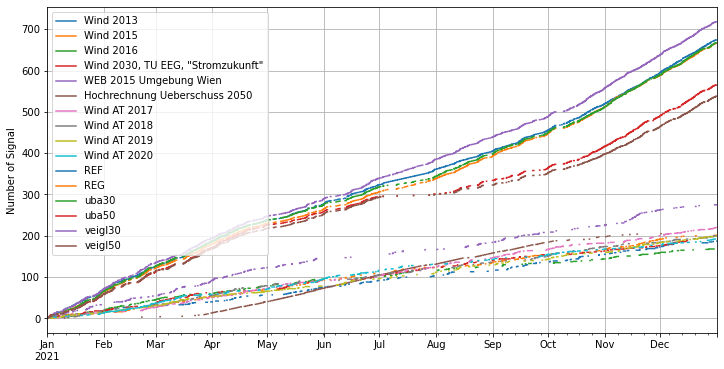

In [20]:
fig, ax = plt.subplots()
df_step["2021"].plot(figsize=(12,6), ylabel="Number of Signal", grid=True, ax=ax)

fig.savefig("cumplot.png", dpi=300)

In [21]:
df_step.fillna(0, inplace=True)
df_not.fillna(0, inplace=True)

In [36]:
desc = pd.DataFrame()
desc["Zeitraum mit Signal [h]"] = df_sign.where(df_sign>0).sum()
desc["Nicht-Signal-Zeitraum [h]"] = 8760 - desc["Zeitraum mit Signal [h]"]
desc["Anzahl Signal-Perioden"] = df_step.max()
desc["Durchschnittliche Dauer Signal [h]"] = (desc["Zeitraum mit Signal [h]"]/desc["Anzahl Signal-Perioden"])
desc["Durchschnittliche Dauer Nicht-Signal [h]"] = desc["Nicht-Signal-Zeitraum [h]"]/desc["Anzahl Signal-Perioden"]

desc

,Zeitraum mit Signal [h],Nicht-Signal-Zeitraum [h],Anzahl Signal-Perioden,Durchschnittliche Dauer Signal [h],Durchschnittliche Dauer Nicht-Signal [h]
Wind 2013,1994.0,6766.0,187.0,10.663102,36.181818
Wind 2015,2156.0,6604.0,201.0,10.726368,32.855721
Wind 2016,2006.0,6754.0,168.0,11.940476,40.202381
"Wind 2030, TU EEG, ""Stromzukunft""",2591.0,6169.0,188.0,13.781915,32.813830
WEB 2015 Umgebung Wien,1584.0,7176.0,275.0,5.760000,26.094545
Hochrechnung Ueberschuss 2050,1207.0,7553.0,205.0,5.887805,36.843902
Wind AT 2017,2615.0,6145.0,220.0,11.886364,27.931818
Wind AT 2018,2054.0,6706.0,200.0,10.270000,33.530000
Wind AT 2019,2810.0,5950.0,199.0,14.120603,29.899497
Wind AT 2020,2545.0,6215.0,192.0,13.255208,32.369792


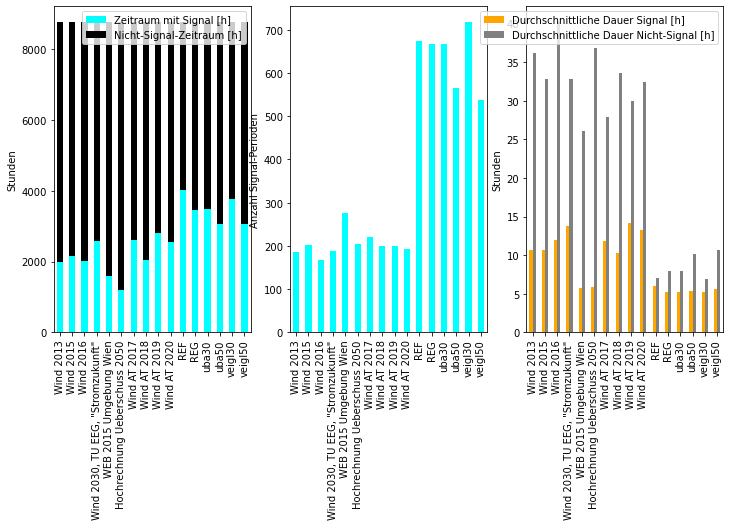

In [37]:
fig, ax = plt.subplots(1,3, figsize=(12,6))
desc[["Zeitraum mit Signal [h]","Nicht-Signal-Zeitraum [h]"]]\
    .plot(kind="bar",color=["cyan", "black"], stacked=True, ax = ax[0])
ax[0].set_ylabel("Stunden")
desc["Anzahl Signal-Perioden"]\
    .plot(kind="bar",color=["cyan"], stacked=True, ax = ax[1])
ax[1].set_ylabel("Anzahl Signal-Perioden")
desc[["Durchschnittliche Dauer Signal [h]","Durchschnittliche Dauer Nicht-Signal [h]"]]\
    .plot(kind="bar",color=["orange", "grey"], stacked=False, ax = ax[2])
ax[2].set_ylabel("Stunden")
fig.savefig("descriptive.png", dpi=300, bbox_inches='tight')

In [ ]:
df_step.head()

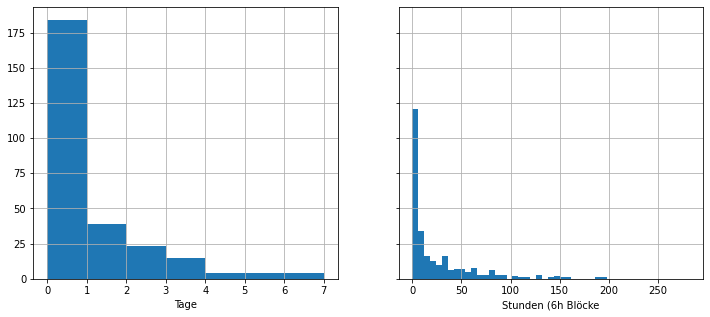

In [38]:
daily = df_not["WEB 2015 Umgebung Wien"].value_counts().sort_index()/24
hourly = df_not["WEB 2015 Umgebung Wien"].value_counts().sort_index()

hours = [6*i for i in range(8*6)]
days = range(8)
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)
daily.hist(bins=days, ax = ax[0])
hourly.hist(bins=hours, ax=ax[1])
ax[0].set_xlabel("Tage")
ax[1].set_xlabel("Stunden (6h Blöcke")
fig.set_label("Signals shorter than x days")

In [ ]:
df_not

In [39]:
df_hourly_not = pd.DataFrame()
for c in df_not.columns:
    df_hourly_not[c]=(df_not[c]).value_counts(sort=True)
df_hourly_not.sort_index()

,Wind 2013,Wind 2015,Wind 2016,"Wind 2030, TU EEG, ""Stromzukunft""",WEB 2015 Umgebung Wien,Hochrechnung Ueberschuss 2050,Wind AT 2017,Wind AT 2018,Wind AT 2019,Wind AT 2020,REF,REG,uba30,uba50,veigl30,veigl50
0.0,1994,2156,2006.0,2591,1584,1207,2615,2054,2810,2545,4028,3457,3478,3050,3752,3048
1.0,33,41,69.0,4,10,226,42,32,13,75,4,4,4,3,4,1
2.0,15,16,179.0,2,3,694,24,6,4,3,2,4,4,3,3,5
3.0,2,73,1.0,10,16,309,30,111,37,47,7,5,5,1,5,2
4.0,11,2,6.0,14,4,237,13,126,2,79,2,5,5,4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182.0,329,18,NaN,3,55,18,63,227,2,51,10,5,1,1,7,15
183.0,6,21,NaN,9,60,18,61,48,1,56,3,4,4,5,1,29
184.0,17,2,NaN,10,26,45,26,24,23,84,9,3,4,1,2,3
185.0,19,57,NaN,35,31,22,124,27,9,57,5,2,3,2,7,3


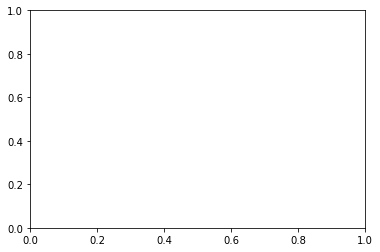

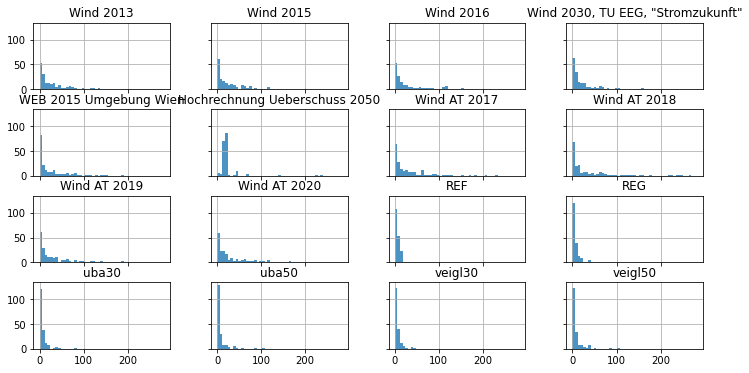

In [40]:
fig, ax = plt.subplots()
df_hourly_not.hist(bins=hours, alpha=0.8, sharey=True, sharex=True, figsize=(12,6))
fig.savefig("hists.png", dpi=300)

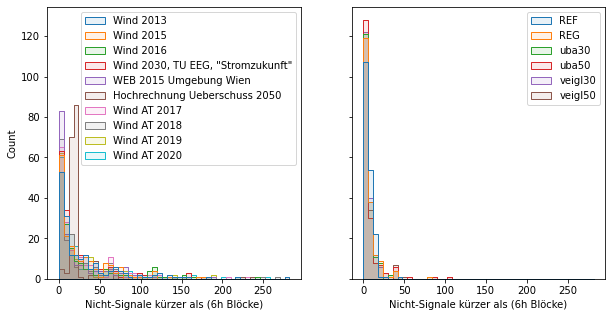

In [41]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
c1 = df_hourly_not.columns[:-6]
c2 = df_hourly_not.columns[-6:]

sns.histplot(df_hourly_not[c1], kde=False,alpha=0.1,linewidth=1,
             fill=True,
             cumulative=False,
             element="step",
             bins=hours, ax=ax[0])
sns.histplot(df_hourly_not[c2], kde=False,alpha=0.1,linewidth=1,
             fill=True,
             cumulative=False,
             element="step",
             bins=hours, ax=ax[1])

ax[0].set_xlabel("Nicht-Signale kürzer als (6h Blöcke)")
ax[1].set_xlabel("Nicht-Signale kürzer als (6h Blöcke)")
fig.savefig("all_hists.png", dpi=300)

doku daziu:
https://seaborn.pydata.org/generated/seaborn.histplot.html

In [ ]:
df = normalize(df)
df.to_csv("peexcel_normalized.csv")